## Portfolio Part 3

In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the rating column has been changed with like or dislike values. Your task is to train classification models to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item| rating | helpfulness | gender | category |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __timestamp__ - the timestamp indicating when the user rated the shopping item
* __review__ - the user's review comments of the item
* __item__ - the name of the item
* __rating__ - the user like or dislike the item
* __helpfulness__ - average rating from other users on whether the review comment is helpful. 6-helpful, 0-not helpful. 
* __gender__ - the gender of the user, F- female, M-male
* __category__ - the category of the shopping item


Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the __rating__ field in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Portfolio 3.csv')
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
5,4259,12100,Come here at least once in your life... stay a...,New York City,like,4,F,Hotels & Travel
6,4259,12400,"I joined for the free camera, and stood for no...",Earthlink,like,3,F,Online Stores & Services
7,4259,12700,They Should've Fooled the American Public,Blair Witch Project,dislike,4,F,Movies
8,4259,51600,A Short List of Things to Remember in NYC,New York City,like,4,F,Hotels & Travel
9,4259,60200,Do you know what a metaphysical can of worms t...,Being John Malkovich,like,4,F,Movies


In [4]:
#convert categorical values into numerical values

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype = int)
df[["review", "item", "rating", "gender", "category"]] = ord_enc.fit_transform(df[["review", "item", "rating", "gender", "category"]])
df

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,856,43,1,4,0,6
1,4259,12000,1985,62,1,4,0,5
2,4259,12000,2006,9,1,4,0,5
3,4259,12000,472,77,1,3,0,5
4,4259,12000,493,68,0,4,0,5
...,...,...,...,...,...,...,...,...
2894,10815,112799,1221,63,1,4,0,5
2895,10815,121299,379,19,1,3,0,5
2896,10815,121399,1546,33,1,4,0,5
2897,10815,121499,2431,9,0,4,0,5


In [5]:
df["review"]

0        856
1       1985
2       2006
3        472
4        493
        ... 
2894    1221
2895     379
2896    1546
2897    2431
2898    1519
Name: review, Length: 2899, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

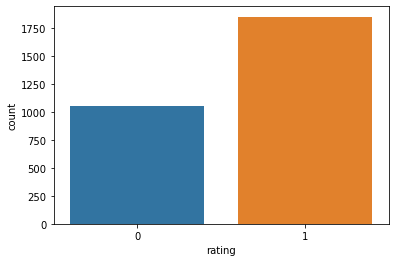

In [6]:
#plot the distribution of rating
sns.countplot(df["rating"])

<AxesSubplot:xlabel='category', ylabel='count'>

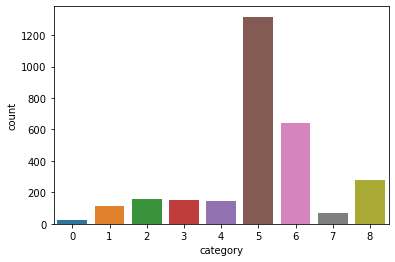

In [18]:
#plotting distributions of category

sns.countplot(df["category"])

<AxesSubplot:xlabel='gender', ylabel='count'>

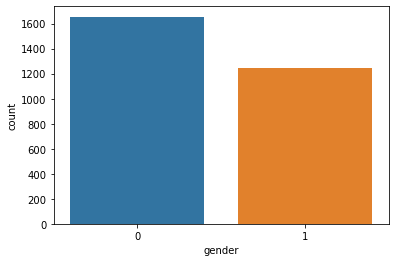

In [19]:
#plotting distributions of gender

sns.countplot(df["gender"])

<AxesSubplot:xlabel='rating', ylabel='count'>

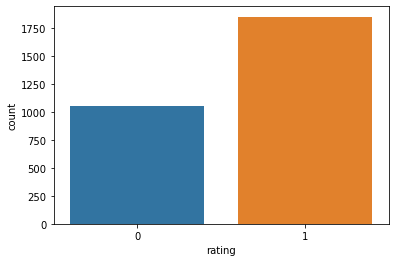

In [20]:
#plotting distributions of rating

sns.countplot(df["rating"])

In [9]:
df.corr()

,userId,timestamp,review,item,rating,helpfulness,gender,category
userId,1.000000,-0.036399,0.013212,-0.002618,0.010844,-0.016841,0.056183,0.015408
timestamp,-0.036399,1.000000,-0.025036,0.024337,0.011579,0.003638,-0.049244,0.037118
review,0.013212,-0.025036,1.000000,0.168119,-0.046935,0.016170,-0.014422,0.012047
item,-0.002618,0.024337,0.168119,1.000000,0.013629,-0.010780,0.006231,-0.054699
rating,0.010844,0.011579,-0.046935,0.013629,1.000000,-0.016850,0.022576,-0.116312
helpfulness,-0.016841,0.003638,0.016170,-0.010780,-0.016850,1.000000,-0.046627,-0.000189
gender,0.056183,-0.049244,-0.014422,0.006231,0.022576,-0.046627,1.000000,-0.017644
category,0.015408,0.037118,0.012047,-0.054699,-0.116312,-0.000189,-0.017644,1.000000


# Logistic Regression Model

In [10]:
df

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,856,43,1,4,0,6
1,4259,12000,1985,62,1,4,0,5
2,4259,12000,2006,9,1,4,0,5
3,4259,12000,472,77,1,3,0,5
4,4259,12000,493,68,0,4,0,5
...,...,...,...,...,...,...,...,...
2894,10815,112799,1221,63,1,4,0,5
2895,10815,121299,379,19,1,3,0,5
2896,10815,121399,1546,33,1,4,0,5
2897,10815,121499,2431,9,0,4,0,5


In [21]:
df.drop("rating", axis = 1)
df["rating"]

0       1
1       1
2       1
3       1
4       0
       ..
2894    1
2895    1
2896    1
2897    0
2898    0
Name: rating, Length: 2899, dtype: int64

In [14]:
#split our data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop("rating", axis = 1), #predictor/all all of the features
    df["rating"], #outcomes/target variables
    test_size = 0.2,
    stratify = df["rating"], #keep the same 0/1 ratio in both the training set and testing set
    random_state = 7 #make the results reproducible
)

In [22]:
x_train.shape

(2319, 7)

In [23]:
x_train.columns

Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category'],
      dtype='object')

In [24]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [25]:
#evaluate the model

y_test_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.6344827586206897

# Tune the model for further Improvements

In [26]:
abs(lr.coef_.flatten())

array([1.37536840e-05, 1.36390041e-06, 1.69848493e-04, 1.89447790e-03,
       2.67496308e-01, 7.21042805e-02, 1.11996606e-01])

In [27]:
x_train.columns

Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category'],
      dtype='object')

In [29]:
d = {"features" : x_train.columns,
"weights" : abs(lr.coef_.flatten())}

pd.DataFrame(data = d).sort_values("weights")

,features,weights
1,timestamp,0.000001
0,userId,0.000014
2,review,0.000170
3,item,0.001894
5,gender,0.072104
6,category,0.111997
4,helpfulness,0.267496


In [31]:
from sklearn.feature_selection import RFE

rfe = RFE(lr, n_features_to_select = 3)

rfe.fit(x_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [32]:
rfe.n_features_

3

In [33]:
rfe.support_

array([False, False, False, False,  True,  True,  True])

In [34]:
rfe.ranking_

array([4, 5, 3, 2, 1, 1, 1])

In [35]:
x_train.columns

Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category'],
      dtype='object')

RFE select "helpfulness", "gender", "category" as most important features

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["helpfulness", "gender", "category"]], #predictor
    df["rating"], 
    stratify = df["rating"],
    test_size = 0.2, 
    random_state = 7 
)

In [39]:
x_train.columns

Index(['helpfulness', 'gender', 'category'], dtype='object')

# Build KNN Model

In [40]:
df

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,856,43,1,4,0,6
1,4259,12000,1985,62,1,4,0,5
2,4259,12000,2006,9,1,4,0,5
3,4259,12000,472,77,1,3,0,5
4,4259,12000,493,68,0,4,0,5
...,...,...,...,...,...,...,...,...
2894,10815,112799,1221,63,1,4,0,5
2895,10815,121299,379,19,1,3,0,5
2896,10815,121399,1546,33,1,4,0,5
2897,10815,121499,2431,9,0,4,0,5


In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("rating", axis = 1), #predictor
    df["rating"], #outcomes
    test_size = 0.2,
    stratify = df["rating"], 
    random_state = 7 
)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 7)

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
y_test_pred = clf.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.5844827586206897

# Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

#define search space for grid search
parameter_grid = {"n_neighbors" : range(5,80)}

clf = KNeighborsClassifier()

In [51]:
#prepare the gridsearch
clf_tune = GridSearchCV(clf, parameter_grid, scoring = "accuracy", cv = 5)

#fit the dataset with respect to gridsearch
clf_tune.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 80)}, scoring='accuracy')

In [52]:
#achieve best params
clf_tune.best_params_

{'n_neighbors': 77}

In [53]:
#find the best score
clf_tune.best_score_

0.6395034259328221

The results obtained above is the highest accuracy score obtained. This tells us that the gridsearch Hyperparameter Tuning was successful and made an impact with the data. The Logistic Regression Model returned a score of 0.6395034259328221, while the gridsearch Hyperparameter Tuning resulted in a higher score of 0.6395034259328221.